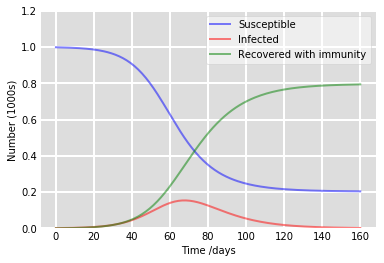

In [11]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

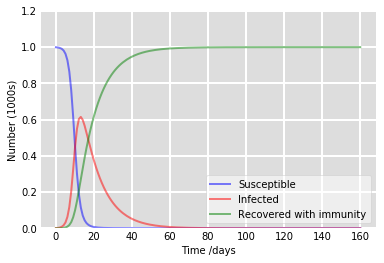

In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.8, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# Library EoN

### SIR Model

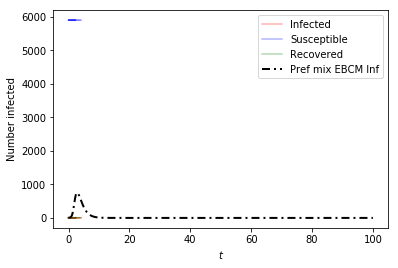

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
import EoN
N=10**5
# G=nx.barabasi_albert_graph(N, 5) #create a barabasi-albert graph

G = nx.Graph()
edges = nx.read_edgelist('politician_edges.txt')
G.add_edges_from(edges.edges())

# G = nx.erdos_renyi_graph(1000, 0.36, seed=None, directed=False)

tmax = 20
iterations = 5 #run 5 simulations
tau = 0.1 #transmission rate
gamma = 1.0 #recovery rate
rho = 0.001 #random fraction initially infected
for counter in range(iterations): #run simulations
#     t, S, I, R = EoN.fast_SIR(G, tau, gamma,  initial_infecteds=['4602',
# '5800',
# '3576',
# '5416',
# '1595',
# '1864',
# '1474',
# '4032',
# '4972',
# '3008'])
# t, S, I, R = EoN.fast_SIR(G, tau, gamma,  initial_infecteds=['4305', '1326','335','512','4106','3591','1217','5433','2533',
#                                                              '3314'])
    if counter == 0:
        plt.plot(t, I, color = 'r', alpha=0.3, label='Infected')
        plt.plot(t, S, color = 'b', alpha=0.3, label='Susceptible')
        plt.plot(t, R, color = 'g', alpha=0.3, label='Recovered')
    plt.plot(t, I, color = 'r', alpha=0.3)
    plt.plot(t, S, color = 'b', alpha=0.3)
    plt.plot(t, R, color = 'g', alpha=0.3)
#Now compare with ODE predictions. Read in the degree distribution of G
#and use rho to initialize the various model equations.
#There are versions of these functions that allow you to specify the
#initial conditions rather than starting from a graph.
#we expect a homogeneous model to perform poorly because the degree
#distribution is very heterogeneous
t, S, I, R = EoN.SIR_homogeneous_pairwise_from_graph(G, tau, gamma, rho=rho, tmax =tmax)
# plt.plot(t, I, '-.', label = 'Homogeneous pairwise', linewidth = 5)
#meanfield models will generally overestimate SIR growth because they
#treat partnerships as constantly changing.
t, S, I, R = EoN.SIR_heterogeneous_meanfield_from_graph(G, tau, gamma, rho=rho,tmax=tmax)
# plt.plot(t, I, ':', label = 'Heterogeneous meanfield', linewidth = 5)
#The EBCM model does not account for degree correlations or clustering
t, S, I, R = EoN.EBCM_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
# plt.plot(t, I, '--', label = 'EBCM approximation', linewidth = 5)
#the preferential mixing model captures degree correlations.
t, S, I, R = EoN.EBCM_pref_mix_from_graph(G, tau, gamma, rho=rho)
plt.plot(t, I, color='k', label = 'Pref mix EBCM Inf', linewidth=2, dashes=[4, 2, 1, 2])
plt.plot(t, R, color='g', label = 'Pref mix EBCM Rec', linewidth=5, dashes=[4, 2, 1, 2])
plt.plot(t, S, color='b', label = 'Pref mix EBCM Susc', linewidth=5, dashes=[4, 2, 1, 2])
plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.savefig('SIR_BA_model_vs_sim.png')

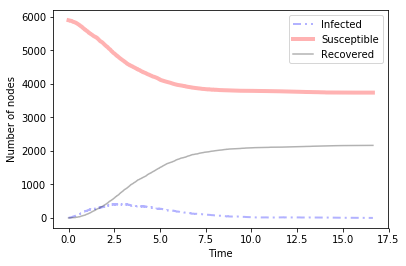

In [58]:
# CLEAN CODE - What is used in CN assignment
import networkx as nx
import matplotlib.pyplot as plt
import EoN

G = nx.Graph()
edges = nx.read_edgelist('politician_edges.txt')
G.add_edges_from(edges.edges())

t, S, I, R = EoN.fast_SIR(G, tau = 0.1, gamma = 1,  initial_infecteds=['4602', '5800', '3576', '5416', '1595'])



# G=nx.erdos_renyi_graph(n = 5908, p = 0.025, seed=None, directed=False)

# t, S, I, R = EoN.fast_SIR(G, tau = 0.1, gamma = 1, rho = 8.463100880162492e-4  )
     
plt.plot(t, I, color = 'b', alpha=0.3, label='Infected',linewidth = 2, dashes = [4, 2, 1, 2])
plt.plot(t, S, color = 'r', alpha=0.3, label='Susceptible',linewidth = 4)
plt.plot(t, R, color = 'k', alpha=0.3, label='Recovered')


plt.xlabel('Time')
plt.ylabel('Number of nodes')
plt.legend()
plt.savefig('kjk.png')

### SIS Model

In [57]:
plt.clf()

<Figure size 432x288 with 0 Axes>

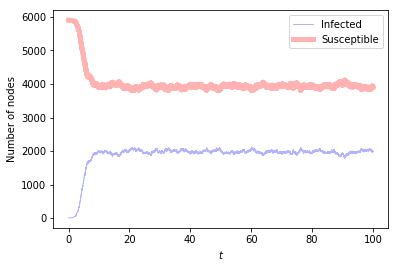

In [51]:
import networkx as nx
import matplotlib.pyplot as plt
import EoN


#Now run for SIS. Simulation is much slower so need smaller network

G = nx.barabasi_albert_graph(n = 5907, m = 7, seed=None)
# G=nx.watts_strogatz_graph(n= 5908, k= 14 , p = 0.19 , seed=665)
# G=nx.erdos_renyi_graph(n = 5908, p = 0.025, seed=None, directed=False)
t, S, I = EoN.fast_SIS(G, tau = 0.1, gamma = 1,  rho = 8.463100880162492e-4 )



plt.plot(t, I, color = 'b', alpha=0.3, label='Infected',linewidth = 1)
plt.plot(t, S, color = 'r', alpha=0.3, label='Susceptible',linewidth = 5)    
#Now compare with ODE predictions. Read in the degree distribution of G
#and use rho to initialize the various model equations.
#There are versions of these functions that allow you to specify the
#initial conditions rather than starting from a graph.
#we expect a homogeneous model to perform poorly because the degree
#distribution is very heterogeneous

# t, S, I = EoN.SIS_homogeneous_pairwise_from_graph(G, tau, gamma, rho=rho)
# plt.plot(t, I, '-.', label = 'Homogeneous pairwise', linewidth = 5)
# t, S, I = EoN.SIS_heterogeneous_meanfield_from_graph(G, tau, gamma, rho=rho)
# plt.plot(t, I, ':', label = 'Heterogeneous meanfield', linewidth = 5)
# t, S, I = EoN.SIS_compact_pairwise_from_graph(G, tau, gamma, rho=rho)
# plt.plot(t, I, '--', label = 'Compact pairwise', linewidth = 5)

plt.xlabel('$t$')
plt.ylabel('Number of nodes')
plt.legend()
plt.savefig('SIS_BA_gamma_1-v.png')

# from book

[[9.99999000e-01 1.00000000e-06 0.00000000e+00]
 [9.99996055e-01 3.64966741e-06 2.95304063e-07]
 [9.99985485e-01 1.31593559e-05 1.35516202e-06]
 [9.99947369e-01 4.74532092e-05 5.17732698e-06]
 [9.99809987e-01 1.71058575e-04 1.89549056e-05]
 [9.99315303e-01 6.16116637e-04 6.85803972e-05]
 [9.97537151e-01 2.21568587e-03 2.47163570e-04]
 [9.91184992e-01 7.92727469e-03 8.87733548e-04]
 [9.68987928e-01 2.78532303e-02 3.15884192e-03]
 [8.97021359e-01 9.20814169e-02 1.08972243e-02]
 [7.10533894e-01 2.55198783e-01 3.42673227e-02]
 [4.16254892e-01 4.95859506e-01 8.78856016e-02]
 [1.81009913e-01 6.47601951e-01 1.71388136e-01]
 [7.02756394e-02 6.63464569e-01 2.66259791e-01]
 [2.81753698e-02 6.13916972e-01 3.57907658e-01]
 [1.23171971e-02 5.46803480e-01 4.40879323e-01]
 [5.93052075e-03 4.79901640e-01 5.14167839e-01]
 [3.12942081e-03 4.18601275e-01 5.78269304e-01]
 [1.79337332e-03 3.64109920e-01 6.34096706e-01]
 [1.10537879e-03 3.16274314e-01 6.82620307e-01]
 [7.26162083e-04 2.74521454e-01 7.247523

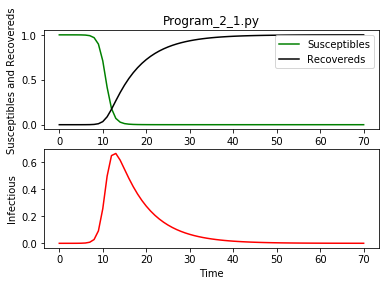

In [33]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

beta=1.4247
gamma=0.14286
TS=1.0
ND=70.0
S0=1-1e-6
I0=1e-6
INPUT = (S0, I0, 0.0)


def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP    
	Y[0] = - beta * V[0] * V[1]
	Y[1] = beta * V[0] * V[1] - gamma * V[1]
	Y[2] = gamma * V[1]
	return Y   # For odeint

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

print (RES)

#Ploting
pl.subplot(211)
pl.plot(RES[:,0], '-g', label='Susceptibles')
pl.plot(RES[:,2], '-k', label='Recovereds')
pl.legend(loc=0)
pl.title('Program_2_1.py')
pl.xlabel('Time')
pl.ylabel('Susceptibles and Recovereds')
pl.subplot(212)
pl.plot(RES[:,1], '-r', label='Infectious')
pl.xlabel('Time')
pl.ylabel('Infectious')

pl.show()

# Animation

D:\ProgramsInstalledFiles\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


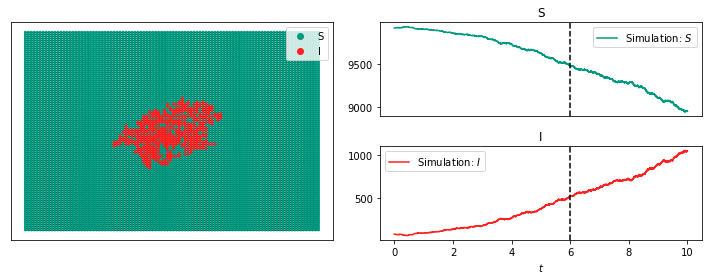

In [5]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
G = nx.grid_2d_graph(100,100) #each node is (u,v) where 0<=u,v<=99

#we'll initially infect those near the middle
initial_infections = [(u,v) for (u,v) in G if 45<u<55 and 45<v<55]
sim = EoN.fast_SIS(G, 1.0, 1.0, initial_infecteds = initial_infections,
return_full_data=True, tmax = 10)
pos = {node:node for node in G}
sim.set_pos(pos)
sim.display(6, node_size = 4) #display time 6
plt.savefig('SIS_2dgrid.png')

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


KeyError: 'PNG'

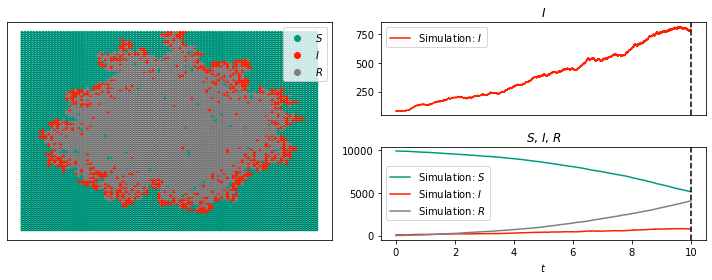

In [6]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
G = nx.grid_2d_graph(100,100) #each node is (u,v) where 0<=u,v<=99
#we'll initially infect those near the middle
initial_infections = [(u,v) for (u,v) in G if 45<u<55 and 45<v<55]
sim = EoN.fast_SIR(G, 2.0, 1.0, initial_infecteds = initial_infections,
return_full_data=True, tmax = 10)
pos = {node:node for node in G}
sim.set_pos(pos)
ani=sim.animate(ts_plots=['I', 'SIR'], node_size = 4)
ani.save('SIR_2dgrid.png', fps=5, extra_args=['-vcodec', 'libx264'])